*Теоретический материал:* https://youtu.be/KsCWLtIQK9k

*Разбор данного раздела:* https://youtu.be/KsCWLtIQK9k?t=525

# Import библиотек


**Загрузка основных библиотек и дополнительных модулей**

In [ ]:
%matplotlib inline

#Автоматическая перезагрузка модулей при их изменении/обновлении 
%load_ext autoreload
%autoreload 2

#Импортируем keras и инструменты keras_retinanet
import keras
from google.colab import files
#И другие необходимые библиотеки
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import time
import sys

# Загрузка файлов

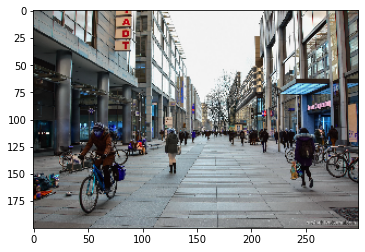

In [ ]:
#Читаем изображение с помощью OpenCV
im = cv2.imread('/content/39582204321_c22a7c5629_h.jpg')
    
#Задаём желаемые размеры изображения
newHeight = 200                             #указываем высоту
newWidth = int(im.shape[1]*200/im.shape[0]) #пропорционально этому меняем ширину
im = cv2.resize(im, (newWidth, newHeight))  #применяем заданные размеры к изображению
#Выводим исходную картинку
%matplotlib inline
plt.imshow(im)
plt.show()

# Selective Search(селективный поиск)

In [ ]:
#Подключаем режим мультипроцессорности для более быстрой работы алгоритма
cv2.setUseOptimized(True) #активируем режим оптимизации
cv2.setNumThreads(8)      #задаем количество потоков

In [ ]:
# Создаем Объект Selective Search Segmentation
sss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# Передаем алгоритму картинку
sss.setBaseImage(im)
  
# Выбираем медленный, но более точный метод (по умолчанию работает метод Fast)
sss.switchToSelectiveSearchQuality()

# Запускаем selective search segmentation на переданном изображении
rects = sss.process() #результат вернётся в виде прямоугольников внутри которых предположительно находятся объекты
print(rects.shape) #выводим количество прямоугольников

(4148, 4)


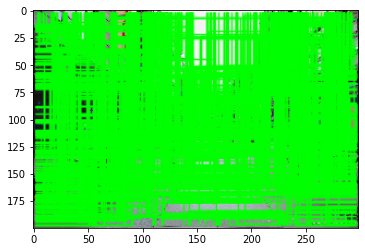

In [ ]:
#Задаём способы обработки изображения

numShowRects = 2000 #кол-во region proposals (прямоугольников, описывающих объект)

imOut = im.copy() #создаем копию исходной картинки

for i, rect in enumerate(rects): #проходим по каждому прямоугольнику
  if (i < numShowRects): #пока не наберётся заданное кол-во прямоугольников
    x, y, w, h = rect      # x,y - координаты точки вершины; w, h - шаги от вершины вправо, вниз
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA) #метод нарисует на изображении прямоугольник по указанным параметрам
  else: #если кол-во прямоугольников превысит заданное
    break #то останавливаемся

#Взглянем на результаты
plt.imshow(imOut) 
plt.show()